In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
wine_data = pd.read_csv('winemag-data_first150k.csv', sep = ',', encoding = 'utf-8', header = 0 )

In [3]:
df = pd.read_csv('winemag-data-130k-v2.csv', sep = ',', encoding = 'utf-8', header = 0)

In [4]:
wine_data = wine_data.append(df, ignore_index = True)

C:\Users\Public\Documents\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [5]:
print(wine_data)

        Unnamed: 0      country  \
0                0           US   
1                1        Spain   
2                2           US   
3                3           US   
4                4       France   
5                5        Spain   
6                6        Spain   
7                7        Spain   
8                8           US   
9                9           US   
10              10        Italy   
11              11           US   
12              12           US   
13              13       France   
14              14           US   
15              15           US   
16              16           US   
17              17        Spain   
18              18       France   
19              19           US   
20              20           US   
21              21        Spain   
22              22        Spain   
23              23           US   
24              24           US   
25              25  New Zealand   
26              26           US   
27              27  

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


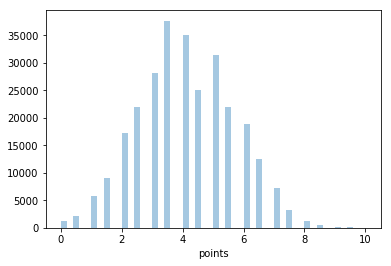

In [67]:
sns.distplot(wine_data.points, kde=False)
plt.show()

In [6]:
# Looking at the statistics for points
wine_data['points'].describe()

count    280901.000000
mean         88.146934
std           3.151528
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [7]:
# Looking at the statistics for price
wine_data['price'].describe()

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [8]:
# Clearly shows that the points score is much higher. Should think about changing to a ten point scale
# To over a better understanding of the wines with the higher rating (80 = 0, ..., 100 = 10)
# To give better validality to the ratings
# Looking at the value counts for each variable
wine_data['country'].value_counts()

US                        116901
France                     43191
Italy                      43018
Spain                      14913
Portugal                   11013
Chile                      10288
Argentina                   9431
Australia                   7286
Austria                     6402
New Zealand                 4739
Germany                     4617
South Africa                3659
Greece                      1350
Israel                      1135
Canada                       453
Hungary                      377
Romania                      259
Bulgaria                     218
Uruguay                      201
Slovenia                     181
Croatia                      162
Turkey                       142
Mexico                       133
Moldova                      130
Georgia                      129
England                       83
Brazil                        77
Lebanon                       72
Cyprus                        42
Morocco                       40
Macedonia 

In [9]:
wine_data['designation'].value_counts()

Reserve                                          4761
Reserva                                          3069
Estate                                           2893
Barrel sample                                    1701
Riserva                                          1452
Brut                                             1137
Estate Grown                                     1070
Barrel Sample                                     891
Crianza                                           846
Dry                                               787
Estate Bottled                                    738
Gran Reserva                                      591
Old Vine                                          552
Vieilles Vignes                                   533
Brut Rosé                                         524
Extra Dry                                         448
Tradition                                         379
Rosé                                              346
Réserve                     

In [10]:
wine_data['province'].value_counts()

California                                80755
Washington                                18389
Tuscany                                   13178
Bordeaux                                  12052
Oregon                                     9962
Northern Spain                             8743
Burgundy                                   8288
Mendoza Province                           8006
Piedmont                                   7822
Veneto                                     6678
New York                                   5116
South Australia                            4353
Sicily & Sardinia                          4342
Northeastern Italy                         4120
Alsace                                     4120
Loire Valley                               3642
Southwest France                           3104
Champagne                                  2983
Southern Italy                             2788
Central Italy                              2763
Catalonia                               

In [11]:
wine_data.groupby('province').count()

,Unnamed: 0,country,description,designation,points,price,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
province,,,,,,,,,,,,,
Achaia,7,7,7,7,7,7,0,0,5,5,5,7,7
Aconcagua Costa,32,32,32,19,32,32,0,0,27,27,27,32,32
Aconcagua Valley,310,310,310,235,310,308,0,0,113,113,116,310,310
Aegean,38,38,38,36,38,36,0,0,22,22,22,38,38
Agioritikos,3,3,3,3,3,3,0,0,3,3,3,3,3
Ahr,14,14,14,11,14,14,0,0,9,0,9,14,14
Aigialias Slopes,2,2,2,0,2,2,0,0,0,0,0,2,2
Alenquer,14,14,14,14,14,11,0,0,7,7,7,14,14
Alentejano,1809,1809,1809,1580,1809,1521,0,0,937,937,937,1809,1809


In [12]:
wine_data['points'] = (wine_data['points'] - 80)/2

In [13]:
winery_df = wine_data.groupby('winery').mean()

In [14]:
variety_df = wine_data.groupby('variety').mean()

In [15]:
print(variety_df)

                           Unnamed: 0    points      price
variety                                                   
Abouriou                 91176.666667  3.833333  35.000000
Agiorgitiko              78795.748634  3.008197  20.794444
Aglianico                64348.621302  4.466716  36.209765
Aidani                   44949.500000  1.000000  27.000000
Airen                    68056.777778  0.722222   8.888889
Albana                   68138.375000  4.875000  28.088235
Albanello                 3786.000000  3.000000  20.000000
Albariño                 71826.490138  3.767258  20.608566
Albarossa                72435.666667  4.000000  40.000000
Albarín                  23601.000000  2.000000  15.000000
Aleatico                 64900.750000  3.000000  38.428571
Alfrocheiro              66432.500000  4.411765  25.205882
Alicante                 68977.133333  3.666667  23.866667
Alicante Bouschet        62161.054348  4.364130  30.586207
Aligoté                  71220.650000  3.066667  18.7288

In [16]:
print(winery_df)

                         Unnamed: 0    points       price
winery                                                   
'37 Cellars            89511.000000  4.000000         NaN
1+1=3                  89952.375000  2.437500   16.750000
10 Knots               87175.150000  2.075000   23.350000
100 Percent Wine       77968.000000  3.166667   18.000000
1000 Stories           37633.666667  5.166667   19.000000
1040FU                127243.000000  1.000000   25.000000
1070 Green             78785.500000  4.000000   25.000000
10Span                 63662.166667  1.666667   13.000000
12 Linajes             78383.200000  4.366667   26.733333
12C Wines              61609.000000  6.333333   93.000000
13 Celsius             83597.000000  3.500000   15.000000
14 Hands               51100.505882  3.729412   17.876543
16X20                  85468.500000  2.750000   40.000000
1752 Signature Wines   67141.000000  4.000000   20.000000
1789 Wines             98968.500000  5.500000   48.000000
181           

In [17]:
variety_df = variety_df.drop(columns = ['Unnamed: 0'])

In [18]:
winery_df_points = winery_df.sort_values(by=['points'], ascending = False)
winery_df_price = winery_df.sort_values(by=['price'], ascending = False)
variety_df_points = variety_df.sort_values(by=['points'], ascending = False)
variety_df_price = variety_df.sort_values(by=['price'], ascending = False)

In [19]:
print(variety_df_points)

                             points       price
variety                                        
Terrantez                  7.500000  236.000000
Tinta del Pais             7.500000   47.500000
Riesling-Chardonnay        7.000000   40.000000
Ramisco                    6.500000  495.000000
Blauburgunder              6.500000   19.000000
Garnacha-Cariñena          6.500000   57.000000
Sirica                     6.375000   29.750000
Cabernet-Shiraz            6.333333  105.666667
Bual                       6.272727   78.000000
Tokay                      6.270833   71.875000
Rosenmuskateller           6.250000  150.000000
Roviello                   6.250000   28.000000
Muscadel                   6.227273  131.181818
Sercial                    6.166667   35.500000
Caprettone                 6.000000   19.000000
Babosa Negro               6.000000   45.000000
Pignolo                    6.000000   70.000000
Centesimino                6.000000   36.000000
Moscato di Noto            6.000000   40

In [20]:
print(variety_df_price)

                                      points       price
variety                                                 
Ramisco                             6.500000  495.000000
Terrantez                           7.500000  236.000000
Francisa                            5.500000  160.000000
Rosenmuskateller                    6.250000  150.000000
Muscadel                            6.227273  131.181818
Malbec-Cabernet                     5.833333  113.333333
Cabernet-Shiraz                     6.333333  105.666667
Muscadelle                          5.961538   96.769231
Mazuelo                             3.916667   85.000000
Debit                               3.722222   81.000000
Bual                                6.272727   78.000000
Champagne Blend                     4.911352   74.315718
Tinto Fino                          4.945714   72.337143
Tokay                               6.270833   71.875000
Picolit                             5.535714   71.000000
Pignolo                        

In [21]:
wine_data.to_csv('winedata.csv', sep=',', encoding='utf-8')

In [22]:
print(winery_df_points)

                                 Unnamed: 0     points        price
winery                                                             
Sloan                         128897.000000  10.000000   245.000000
Gandona                       106165.500000   8.500000   190.000000
Ovid                          106165.000000   8.500000   195.000000
Château Climens                75371.615385   8.346154   138.250000
Araujo                         99884.333333   8.333333   215.000000
Château Pétrus                 78867.562500   8.312500  2250.000000
Château d'Yquem                95589.636364   8.272727   800.000000
Cardinale                      96050.600000   8.250000   220.000000
Domaine des Lambrays           81644.400000   8.200000   215.000000
Au Sommet                      80486.600000   8.200000   250.000000
Salon                          86139.583333   8.083333   360.666667
Tenuta dell'Ornellaia          67754.744186   8.034884   249.976744
D'Alfonso-Curran              116147.000000   8.

In [23]:
wine_data.loc[wine_data['variety'] == 'Cabernet-Shiraz']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2458,2458,Australia,This is a top example of the classic Australia...,The Peake,8.0,150.0,South Australia,McLaren Vale,NaN,NaN,NaN,NaN,Cabernet-Shiraz,Hickinbotham
210907,59977,Australia,This is a top example of the classic Australia...,The Peake,8.0,150.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Hickinbotham 2013 The Peake Cabernet-Shiraz (M...,Cabernet-Shiraz,Hickinbotham
233852,82922,US,This is a full-bodied wine with a good sense o...,NaN,3.0,17.0,California,Lodi,Central Valley,Jim Gordon,@gordone_cellars,Van Ruiten 2013 Cabernet-Shiraz (Lodi),Cabernet-Shiraz,Van Ruiten


In [24]:
# Looking at wineries that are the best option in regards to the points given to wines
# Looking at Van Ruiten because it dropes the variety score of Cabernet-Shiraz
wine_data.loc[wine_data['winery'] == 'Van Ruiten']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
5774,5774,US,"Soft and structured, this wine has an opening ...",Old Vine,4.0,17.0,California,Lodi,Central Valley,NaN,NaN,NaN,Zinfandel,Van Ruiten
86244,86244,US,"Tart in acidity and very fruity, this Chardonn...",Estate Grown,1.5,14.0,California,Lodi,Central Valley,NaN,NaN,NaN,Chardonnay,Van Ruiten
87149,87149,US,"Soft, sugary sweet and simple, with pie-fillin...",Estate Grown,0.0,16.0,California,Lodi,Central Valley,NaN,NaN,NaN,Cabernet Sauvignon,Van Ruiten
105344,105344,US,"Rich in the flavors of blackberry, cherry, ras...",Old Vine,3.0,18.0,California,Lodi,Central Valley,NaN,NaN,NaN,Zinfandel,Van Ruiten
141437,141437,US,"Dry and rustic, with sharply edged coffee and ...",Cab-Shiraz,0.5,15.0,California,Lodi,Central Valley,NaN,NaN,NaN,Red Blend,Van Ruiten
141446,141446,US,"Soft, simple and not even very sweet, with che...",Late Harvest,0.0,26.0,California,Lodi,Central Valley,NaN,NaN,NaN,Zinfandel,Van Ruiten
141751,141751,US,"Soft, dry and earthy, with diluted fruit flavo...",NaN,0.0,15.0,California,Lodi,Central Valley,NaN,NaN,NaN,Cabernet Sauvignon,Van Ruiten
153652,2722,US,Lively aromas like crisp apple and white peach...,NaN,3.0,13.0,California,Lodi,Central Valley,Jim Gordon,@gordone_cellars,Van Ruiten 2015 Chardonnay (Lodi),Chardonnay,Van Ruiten
176851,25921,US,"Very ripe in aroma, almost thick in texture an...",Old Vine,3.5,17.0,California,Lodi,Central Valley,Jim Gordon,@gordone_cellars,Van Ruiten 2013 Old Vine Zinfandel (Lodi),Zinfandel,Van Ruiten
198051,47121,US,This abundantly rich wine seems to melt in the...,NaN,5.5,17.0,California,Lodi,Central Valley,Jim Gordon,@gordone_cellars,Van Ruiten 2012 Cabernet Sauvignon (Lodi),Cabernet Sauvignon,Van Ruiten


In [25]:
wine_data.loc[wine_data['winery'] == 'Hickinbotham']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2458,2458,Australia,This is a top example of the classic Australia...,The Peake,8.0,150.0,South Australia,McLaren Vale,NaN,NaN,NaN,NaN,Cabernet-Shiraz,Hickinbotham
5078,5078,Australia,"Austere, tannic and chewy, this Cabernet could...",Trueman,6.5,75.0,South Australia,McLaren Vale,NaN,NaN,NaN,NaN,Cabernet Sauvignon,Hickinbotham
210907,59977,Australia,This is a top example of the classic Australia...,The Peake,8.0,150.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Hickinbotham 2013 The Peake Cabernet-Shiraz (M...,Cabernet-Shiraz,Hickinbotham
219607,68677,Australia,"Austere, tannic and chewy, this Cabernet could...",Trueman,6.5,75.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Hickinbotham 2013 Trueman Cabernet Sauvignon (...,Cabernet Sauvignon,Hickinbotham
238344,87414,Australia,"As Australian vineyards go, this isn't that ol...",Brooks Road,7.0,75.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Hickinbotham 2013 Brooks Road Shiraz (McLaren ...,Shiraz,Hickinbotham


In [26]:
counts_df = wine_data.groupby('variety').count()

In [75]:
counts_df = counts_df.sort_values(by=['points'], ascending = False)

In [76]:
list_variety = counts_df.index.tolist()

In [80]:
print(counts_df)

                               Unnamed: 0  country  description  designation  \
variety                                                                        
Pinot Noir                          27563    27557        27563        20047   
Chardonnay                          26235    26232        26235        17286   
Cabernet Sauvignon                  22272    22270        22272        13393   
Red Blend                           19008    18996        19008        16314   
Bordeaux-style Red Blend            14262    14262        14262         8359   
Sauvignon Blanc                     11287    11283        11287         6225   
Riesling                            10713    10712        10713         8848   
Syrah                                9967     9967         9967         7084   
Merlot                               8172     8171         8172         4156   
Zinfandel                            6513     6513         6513         4876   
Rosé                                 638

In [83]:
#variety_df_points.append(counts_df['points'], ignore_index = True)

In [79]:
#variety_df_points.loc[variety_df_points.name == 'Pinot Noir']
#print(variety_df_points.iloc[0].Name)
all_variety = variety_df_points.loc[list_variety]
print(all_variety)

                                 points       price
variety                                            
Pinot Noir                     4.526322   45.751921
Chardonnay                     4.006289   33.261275
Cabernet Sauvignon             4.152299   44.611915
Red Blend                      4.106324   35.709981
Bordeaux-style Red Blend       4.646052   48.108649
Sauvignon Blanc                3.548419   19.327305
Riesling                       4.470083   30.783091
Syrah                          4.377446   37.727468
Merlot                         3.383933   28.171823
Zinfandel                      3.575618   27.907259
Rosé                           3.351042   18.122139
Sangiovese                     4.107816   40.314878
Malbec                         3.822355   27.592814
White Blend                    3.578125   22.723445
Nebbiolo                       5.176710   65.925389
Portuguese Red                 4.358607   24.371756
Tempranillo                    3.517064   30.452944
Sparkling Bl

In [81]:
all_variety.loc[all_variety['points'] >= 4.6]

,points,price
variety,,
Bordeaux-style Red Blend,4.646052,48.108649
Nebbiolo,5.176710,65.925389
Champagne Blend,4.911352,74.315718
Grüner Veltliner,4.828027,28.022647
Sangiovese Grosso,5.193610,62.546824
Blaufränkisch,4.842048,30.493703
Sagrantino,4.799539,52.400000
Sherry,4.741379,31.606965
St. Laurent,4.605670,32.286585


In [29]:
top_bsrd = wine_data.loc[wine_data['variety'] == 'Bordeaux-style Red Blend']

In [ ]:
all_variety.sort_values(by=['points'], ascending = False)

In [61]:
not_top_bsrd = wine_data.loc[wine_data['variety'] != 'Bordeaux-style Red Blend']

In [63]:
not_top_bsrd.describe()

,Unnamed: 0,points,price
count,266639.000000,266639.000000,248325.000000
mean,70695.255983,4.042841,33.622595
std,41235.358723,1.567915,35.500598
min,0.000000,0.000000,4.000000
25%,35125.500000,3.000000,16.000000
50%,70213.000000,4.000000,25.000000
75%,105435.500000,5.000000,40.000000
max,150929.000000,10.000000,2500.000000


In [64]:
top_bsrd.describe()

,Unnamed: 0,points,price
count,14262.000000,14262.000000,9885.000000
mean,69128.457439,4.646052,48.108649
std,40793.049859,1.612194,84.154769
min,67.000000,0.000000,7.000000
25%,34927.750000,3.500000,20.000000
50%,70403.500000,4.500000,32.000000
75%,102830.500000,6.000000,50.000000
max,150851.000000,10.000000,3300.000000


C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


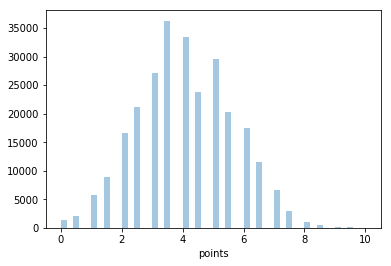

In [66]:
sns.distplot(not_top_bsrd.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


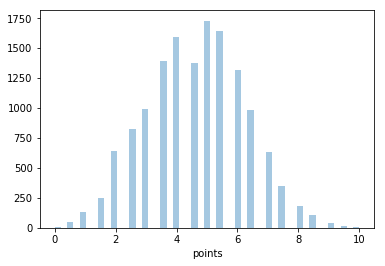

In [65]:
sns.distplot(top_bsrd.points, kde=False)
plt.show()

In [62]:
ttest_ind(not_top_bsrd['points'], top_bsrd['points'])

Ttest_indResult(statistic=-44.69842857586555, pvalue=0.0)

In [30]:
#Looking at the largest amount of reviews with the highest average points rating
top_bsrd.sort_values(by=['points'], ascending = False)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
209282,58352,France,"This is a magnificently solid wine, initially ...",NaN,10.0,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
262683,111753,France,"Almost black in color, this stunning wine is g...",NaN,10.0,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
262685,111755,France,This is the finest Cheval Blanc for many years...,NaN,10.0,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
268988,118058,US,This wine dazzles with perfection. Sourced fro...,La Muse,10.0,450.0,California,Sonoma County,Sonoma,NaN,NaN,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité
262686,111756,France,"A hugely powerful wine, full of dark, brooding...",NaN,10.0,359.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
262688,111758,France,"Stern, almost severe initially, this great win...",NaN,9.5,NaN,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Latour 2010 Pauillac,Bordeaux-style Red Blend,Château Latour
267024,116094,France,"98-100 Barrel sample. Sumptuous, opulent, with...",Barrel sample,9.5,NaN,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Palmer 2009 Barrel sample (Margaux),Bordeaux-style Red Blend,Château Palmer
131383,131383,France,"98-100 Barrel sample. Sumptuous, opulent, with...",Barrel sample,9.5,NaN,Bordeaux,Margaux,NaN,NaN,NaN,NaN,Bordeaux-style Red Blend,Château Palmer
131385,131385,France,"98-100 Barrel sample. A superb wine, with the ...",Barrel sample,9.5,NaN,Bordeaux,Pauillac,NaN,NaN,NaN,NaN,Bordeaux-style Red Blend,Château Pontet-Canet
106485,106485,France,"98-100 Barrel sample. A superb wine, with the ...",Barrel sample,9.5,NaN,Bordeaux,Pauillac,NaN,NaN,NaN,NaN,Bordeaux-style Red Blend,Château Pontet-Canet


In [31]:
rvoss_reviews = wine_data.loc[wine_data['taster_name'] == 'Roger Voss']
print(rvoss_reviews)

        Unnamed: 0       country  \
150931           1      Portugal   
150937           7        France   
150939           9        France   
150941          11        France   
150960          30        France   
150972          42        France   
150979          49        France   
150983          53        France   
150993          63        France   
150995          65        France   
150996          66        France   
150999          69        France   
151009          79      Portugal   
151012          82        France   
151025          95        France   
151026          96        France   
151040         110        France   
151055         125  South Africa   
151062         132  South Africa   
151067         137  South Africa   
151081         151      Portugal   
151087         157      Portugal   
151090         160        France   
151093         163        France   
151096         166        France   
151109         179        France   
151123         193        Fr

In [32]:
rvoss_t1 = rvoss_reviews.loc[rvoss_reviews['variety'] == 'Bordeaux-style Red Blend']
rvoss_t2 = rvoss_reviews.loc[rvoss_reviews['variety'] != 'Bordeaux-style Red Blend']

In [57]:
rvoss_t1.describe()

,Unnamed: 0,points,price
count,4710.000000,4710.000000,3158.000000
mean,64474.978556,4.421762,41.048132
std,37591.494014,1.592342,114.596513
min,290.000000,0.000000,7.000000
25%,31517.000000,3.500000,16.000000
50%,65011.500000,4.500000,22.000000
75%,98278.750000,5.500000,35.000000
max,129839.000000,10.000000,3300.000000


In [58]:
rvoss_t2.describe()

,Unnamed: 0,points,price
count,20804.000000,20804.000000,17014.000000
mean,64481.499279,4.338661,38.204831
std,37463.611915,1.500504,60.248694
min,1.000000,0.000000,5.000000
25%,32178.750000,3.000000,15.000000
50%,63687.000000,4.000000,23.000000
75%,96670.750000,5.500000,40.000000
max,129970.000000,10.000000,2500.000000


In [35]:
rvoss_reviews.groupby('points').count()

,Unnamed: 0,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
points,,,,,,,,,,,,,
0.0,9,9,9,4,8,9,6,0,9,9,9,9,9
0.5,33,33,33,13,27,33,22,0,33,33,33,33,33
1.0,123,122,123,59,83,122,82,0,123,123,123,123,123
1.5,382,381,382,226,306,381,257,0,382,382,382,382,382
2.0,1333,1333,1333,820,1083,1333,938,0,1333,1333,1333,1333,1333
2.5,2218,2218,2218,1425,1850,2218,1523,0,2218,2218,2218,2218,2218
3.0,2445,2445,2445,1625,1978,2445,1699,0,2445,2445,2445,2445,2445
3.5,3060,3060,3060,2047,2505,3060,2236,0,3060,3060,3060,3060,3060
4.0,3495,3495,3495,2403,2845,3495,2529,1,3495,3495,3495,3495,3495


In [36]:
rvoss_t1.var()

Unnamed: 0    1.413120e+09
points        2.535553e+00
price         1.313236e+04
region_2               NaN
dtype: float64

In [37]:
rvoss_t2.var()

Unnamed: 0    1.403522e+09
points        2.251513e+00
price         3.629905e+03
dtype: float64

The data appears to be approximately normal for both data sets.

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


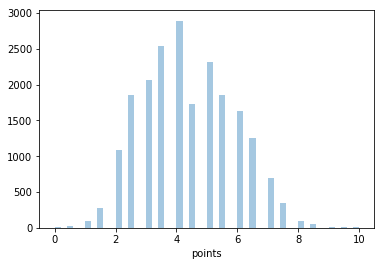

In [52]:
sns.distplot(rvoss_t2.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


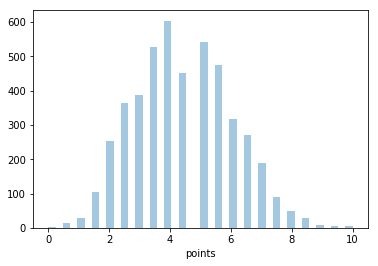

In [51]:
sns.distplot(rvoss_t1.points, kde=False)
plt.show()

In [38]:
#cat1 = my_data[my_data['Category']=='cat1']
#cat2 = my_data[my_data['Category']=='cat2']


#Shows that Bordeaux-style Red Blend is significantly different than his other reviews of wine
#Could represent that he is bias of this specific wine. Testing further
ttest_ind(rvoss_t1['points'], rvoss_t2['points'])


Ttest_indResult(statistic=3.392869510739824, pvalue=0.0006926965593857382)

The first assumption made regarding t-tests concerns the scale of measurement. The assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.

The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.

The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve.

The fourth assumption is a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.

The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

In [39]:
not_rvoss_reviews = wine_data.loc[wine_data['taster_name'] != 'Roger Voss']

In [59]:
not_rvoss_reviews.describe()

,Unnamed: 0,points,price
count,255387.000000,255387.000000,238038.000000
mean,71228.653612,4.045441,33.798125
std,41518.725152,1.578667,34.375403
min,0.000000,0.000000,4.000000
25%,35428.500000,3.000000,16.000000
50%,70935.000000,4.000000,25.000000
75%,106193.000000,5.000000,40.000000
max,150929.000000,10.000000,2300.000000


In [53]:
not_rvoss_reviews.var()

Unnamed: 0    1.723805e+09
points        2.492191e+00
price         1.181668e+03
dtype: float64

In [60]:
rvoss_reviews.describe()

,Unnamed: 0,points,price
count,25514.000000,25514.000000,20172.000000
mean,64480.295524,4.354002,38.649960
std,37486.514606,1.518186,71.540473
min,1.000000,0.000000,5.000000
25%,32051.250000,3.000000,15.000000
50%,63917.500000,4.000000,22.000000
75%,96872.750000,5.500000,40.000000
max,129970.000000,10.000000,3300.000000


In [54]:
rvoss_reviews.var()

Unnamed: 0    1.405239e+09
points        2.304890e+00
price         5.118039e+03
dtype: float64

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


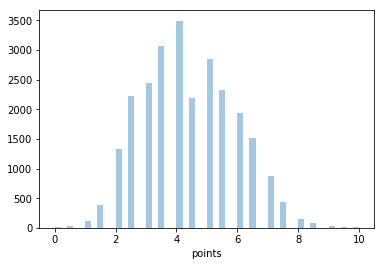

In [55]:
sns.distplot(rvoss_reviews.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


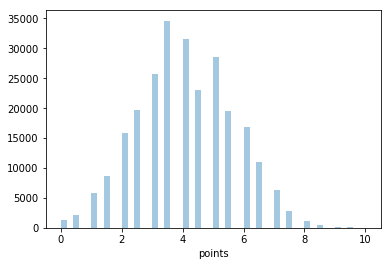

In [56]:
sns.distplot(not_rvoss_reviews.points, kde=False)
plt.show()

In [40]:
rvoss_t11 = rvoss_reviews.loc[rvoss_reviews['variety'] == 'Bordeaux-style Red Blend']
rvoss_t21 = not_rvoss_reviews.loc[not_rvoss_reviews['variety'] != 'Bordeaux-style Red Blend']

Both the data that contains Roger Voss Reviews and Other Reviewers is approximately normal and the varainces are approximately the same.

In [41]:
rvoss_t11.var()

Unnamed: 0    1.413120e+09
points        2.535553e+00
price         1.313236e+04
region_2               NaN
dtype: float64

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


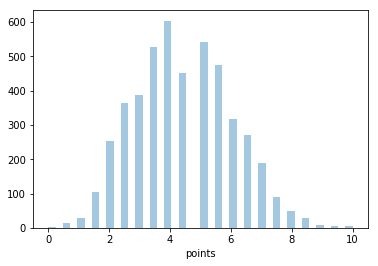

In [49]:
sns.distplot(rvoss_t11.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


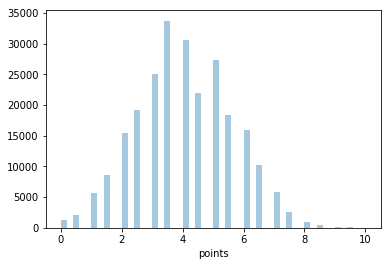

In [50]:
sns.distplot(rvoss_t21.points, kde=False)
plt.show()

In [42]:
rvoss_t21.var()

Unnamed: 0    1.721936e+09
points        2.467837e+00
price         1.084353e+03
dtype: float64

In [43]:
ttest_ind(rvoss_t11['points'], rvoss_t21['points'])

Ttest_indResult(statistic=17.476433225211874, pvalue=2.378928292717473e-68)

This shows that the Bordeaux-style Red Blend reviewed by Ross are significantly different from the rest of the Bordeaux-style Red Blend reviewed by the rest of the population.